<a href="https://kaggle.com/kernels/welcome?src=https://github.com/mayait/ClaseAnalisisDatos/blob/main/python101/EstadisticaDescriptivaPython.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" width=120 /></a>

<a href="https://colab.research.google.com/github/mayait/ClaseAnalisisDatos/blob/main/python101/EstadisticaDescriptivaPython.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width=120 /></a>

In [2]:
#@title Nombre del estudiante
Estudiante = "Emill Logroño" #@param {type:"string"}
Código = "" #@param {type:"string"}

<img src="https://usfq.leanlabs.co/static/img/logo-bp.png" width="200"/>

# **Estadística Descriptiva**

# <center>    </center>


---



## Descripción
Conceptos asociados a la estadística descriptiva implementando Python

## Contenido

* Medidas de Tendencia Central
* Medidas de Dispersión
* Medidas de Posición
* Medidas de Forma
* Distribución Normal
* Covarianza y correlación

## Referencias importantes:
* [Seaborn Charts](https://seaborn.pydata.org/tutorial/distributions.html)
* <a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Dataset </a>
* https://storage.googleapis.com/datasets-academy/Credit.csv



## 1. Dataset de Trabajo

**Credit:** conjunto de datos simulados que contiene información sobre diez mil clientes de una entidad financiera

<a href='https://rdrr.io/cran/ISLR/man/Credit.html'>
  Documentación de las variables </a>

**Diccionario de datos**
* ID: Código de identificación del cliente
* Income: Ingresos del cliente en $10,000's
* Limit: Límite de crédito
* Rating: Puntaje crediticio
* Cards: Número de tarjetas de crédito
* Age: Edad en años
* Education: Número de años de educación
* Gender: Masculino (Male) o Femenino (Female)
* Student: Si el cliente es estudiantes (Yes) o no lo es (No)
* Married: Si el cliente está casado (Yes) o no está (No)
* Ethnicity: Africano (African), Americano (American), Asiático (Asian) y Caucásico (Caucasian)
* Balance: Promedio del saldo de la tarjeta de crédito en dólares


In [3]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

## Descargando el dataset
https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv

In [4]:
!wget https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Importar dataset
pd.read_csv() permite importar un archivo de texto a Pandas

In [5]:
Credit = pd.read_csv('https://raw.githubusercontent.com/mayait/ClaseAnalisisDatos/main/python101/data/Credit.csv')

In [6]:
# Dimensiones del dataset
print(Credit.shape)

(400, 12)


In [7]:
Credit.sample(4) # Me muestro los datos desordenados

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
348,349,13.433,1134,112,3,70,14,Male,No,Yes,Caucasian,0
143,144,19.636,4896,387,3,64,10,Female,No,No,African American,710
391,392,73.327,6555,472,2,43,15,Female,No,No,Caucasian,721
298,299,20.791,2672,204,1,70,18,Female,No,No,African American,0


In [8]:
# Muestra los 20 primeros
Credit.head(5)

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [9]:
Credit["Income"]

0       14.891
1      106.025
2      104.593
3      148.924
4       55.882
        ...   
395     12.096
396     13.364
397     57.872
398     37.728
399     18.701
Name: Income, Length: 400, dtype: float64

In [10]:
Credit.tail()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [11]:
Credit.dtypes

ID             int64
Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [12]:
Credit.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [13]:
#Cuantos son hombres y son mujeres
Credit[Credit['Gender'] != 'Female'].value_counts()


ID   Income  Limit  Rating  Cards  Age  Education  Gender  Student  Married  Ethnicity         Balance
1    14.891  3606   283     2      34   11          Male   No       Yes      Caucasian         333        1
218  12.456  5395   392     3      65   14          Male   No       Yes      Caucasian         955        1
278  41.532  5000   353     2      50   12          Male   No       Yes      Caucasian         531        1
285  14.711  2047   167     2      67   6           Male   No       Yes      Caucasian         0          1
288  60.449  3098   272     4      69   8           Male   No       Yes      Caucasian         0          1
                                                                                                         ..
155  55.056  3155   235     2      31   16          Male   No       Yes      African American  0          1
160  53.319  3000   235     3      53   13          Male   No       No       Asian             0          1
162  31.353  1705   160     3    

In [14]:
Credit[Credit['Gender'] == 'Female'].value_counts()

ID   Income   Limit  Rating  Cards  Age  Education  Gender  Student  Married  Ethnicity         Balance
2    106.025  6645   483     3      82   15         Female  Yes      Yes      Asian             903        1
260  33.657   6196   450     6      55   9          Female  No       No       Caucasian         1092       1
243  20.918   1233   128     3      47   18         Female  Yes      Yes      Asian             16         1
244  58.165   6617   460     1      56   12         Female  No       Yes      Caucasian         856        1
245  22.561   1787   147     4      66   15         Female  No       No       Caucasian         0          1
                                                                                                          ..
127  26.427   5533   433     5      50   15         Female  Yes      Yes      Asian             1404       1
128  57.202   3411   259     3      72   11         Female  No       No       Caucasian         0          1
131  23.793   3821   281

In [15]:
Credit[0:3]  # Iloc es para seleccionar por posición # loc es para seleccionar por etiqueta o columna

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


## 2. Medidas de Tendencia Central

Empezaremos visualizando la distribución de los ingresos por medio de un histograma.

**Ejercicio:** Identificar las características de la distribución.

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


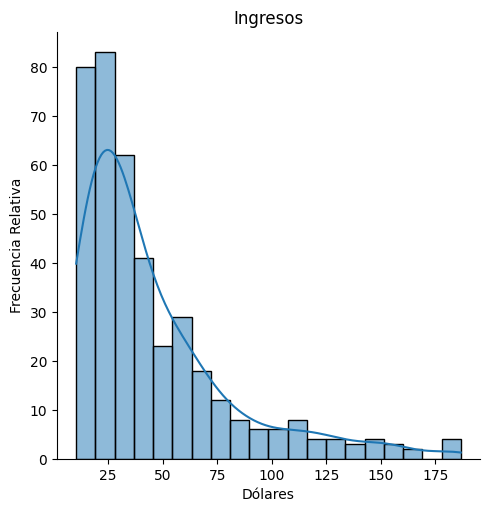

In [16]:
# disploy es para mostrar la gráfica con histograma
sns.displot(Credit, x='Income', bins=20, kde=True) # kde es para que me muestre la curva de densidad, el bins es para que me muestre la cantidad de barras
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.show()


c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

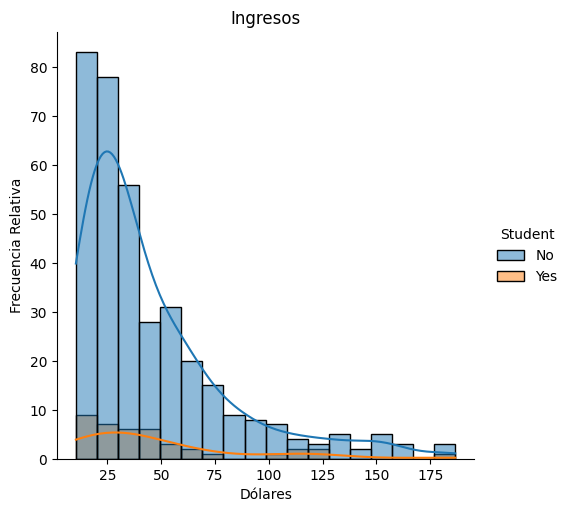

In [17]:
sns.displot(Credit, x='Income', hue='Student', kde=True) #hue crea un histograma por cada una de las categorías de manufactorer_name
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.show()


In [18]:
Credit.groupby('Gender').count()


,ID,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance
Gender,,,,,,,,,,,
Male,193,193,193,193,193,193,193,193,193,193,193
Female,207,207,207,207,207,207,207,207,207,207,207


In [19]:
# Medidas de tendencia central
media_income    = Credit["Income"].mean()
mediana_income  = Credit["Income"].median()
moda_income     = Credit["Income"].mode()

print('Media: ', media_income, '\nMediana: ', mediana_income, '\nModa: ', moda_income[0]) # Sie

Media:  45.218885 
Mediana:  33.1155 
Moda:  23.793


In [20]:
Credit["Income"].mode()

0    23.793
Name: Income, dtype: float64

**¿Cuál de las medidas de tendencia central resumen correctamente a los ingresos?**

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


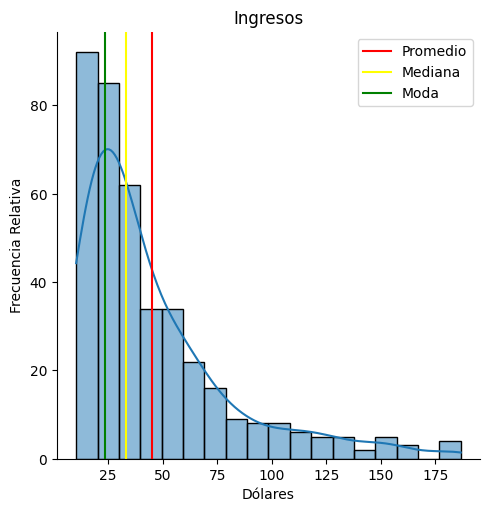

In [21]:
sns.displot(Credit,x='Income', bins='fd', kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(media_income, color='red', label='Promedio')
plt.axvline(mediana_income, color='yellow', label='Mediana')
plt.axvline(moda_income[0], color='green', label='Moda')
plt.legend()
plt.show()

# 🌶 1
**Ejercicio 1:** Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`


```
Respuesta:
Promedio: 4735.6
Mediana: 4622.5
Moda: 855
```



In [22]:
# Obtener el promedio, mediana y moda de la columna `Limit` del  DataFrame `Credit`
media_limit    = Credit["Limit"].mean()
mediana_limit  = Credit["Limit"].median()
moda_limit     = Credit["Limit"].mode()

print('Media: ', media_limit, '\nMediana: ', mediana_limit, '\nModa: ', moda_limit[0])



Media:  4735.6 
Mediana:  4622.5 
Moda:  855


## 3. Medidas de Dispersión

- La desviación estandar es el promedio de los datos que se acercan al medio

- La distribución normal 

### Rango

In [23]:
Credit["Income"].min()

10.354

In [24]:
Credit["Income"].max()

186.634

In [25]:
print("El ingreso mínimo es de:", Credit["Income"].min())
print("El ingreso máximo es de:", Credit["Income"].max())
print("El rango es igual a:", Credit["Income"].max() - Credit["Income"].min())

El ingreso mínimo es de: 10.354
El ingreso máximo es de: 186.634
El rango es igual a: 176.27999999999997


### Varianza y Desviación Estándar
* El argumento ```ddof``` hace referencia al denominador: ```N-ddof```
* ```ddof=0``` si trabajamos con la población
* ```ddof=1``` si trabajamos con la muestra

In [26]:
print("La varianza en la población es igual a:", Credit["Income"].var(ddof=0))
print("La desviación estandar en la población es igual a:", Credit["Income"].std(ddof=0))

La varianza en la población es igual a: 1239.0533939567752
La desviación estandar en la población es igual a: 35.20019025455367


In [27]:
print("La varianza en la muestra es igual a:", Credit["Income"].var())
print("La desviación estandar en la muestra es igual a:", Credit["Income"].std())

La varianza en la muestra es igual a: 1242.1587909341104
La desviación estandar en la muestra es igual a: 35.244273165070524


# 🌶 2

---


**Ejercicio 2:** Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`


```
Respuesta:
Rango: 1999
Varianza muestral: 211378.22533834586
Desv. estándar muestral: 459.75887738938314
```



In [28]:
# Obtener el rango, la varianza muestral y la desviación estándar muestral de la columna `Balance` del  DataFrame `Credit`

🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️🌶️



SyntaxError: invalid character '🌶' (U+1F336) (2716391405.py, line 3)

Jointplot muestra un scatterplot y la distribución de los datos.

Documentación de jointplot: http://seaborn.pydata.org/generated/seaborn.jointplot.html

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

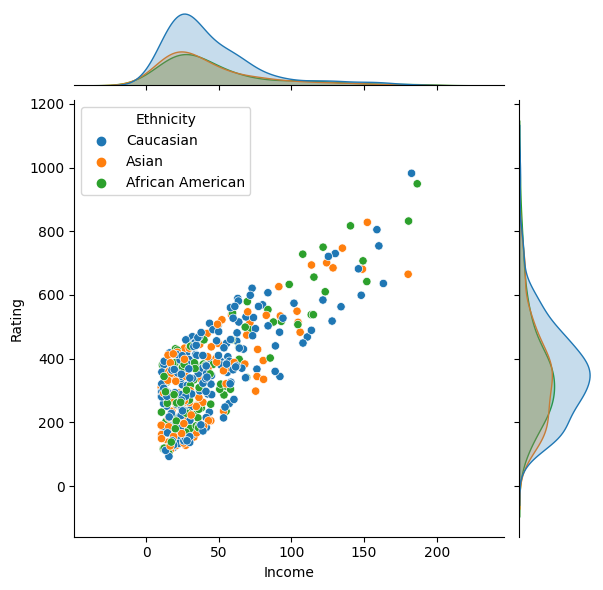

In [29]:
sns.jointplot(data=Credit, x='Income', y='Rating', hue='Ethnicity')


## 4. Medidas de Posición
El método ```describe()``` muestra de forma predeterminada los cuartiles sin embargo, podemos requerir otras medidas de posición de acuerdo a lo que se necesite.

Donde estan los datos segun como los divido

In [30]:
Credit["Income"].describe()

count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64

In [ ]:
# Percentil 90
Credit["Income"].quantile(0.90)

### Rango Intercuartil (IQR)
Medida de dispersión a ser utilizada cuando se emplea la mediana como medida de tendencia central.
Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: $$IRQ = Q3 - Q1$$.

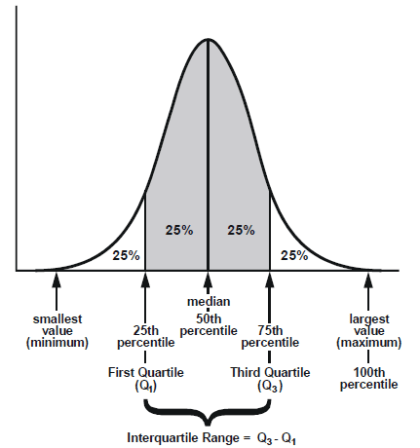

Source:makemeanalyst.com


In [31]:
stats.iqr(Credit["Income"])

36.4635

In [32]:
Credit["Income"].quantile(0.75) - Credit["Income"].quantile(0.25)

36.4635

## BOX-PLOT :

Un diagrama de caja es una forma muy útil y estandarizada de mostrar la distribución de datos basada en un resumen de cinco números (mínimo, primer cuartil, segundo cuartil (mediana), tercer cuartil, máximo).

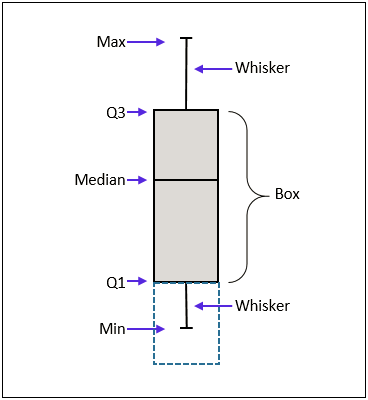

Source: biostats.w.uib.no


c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


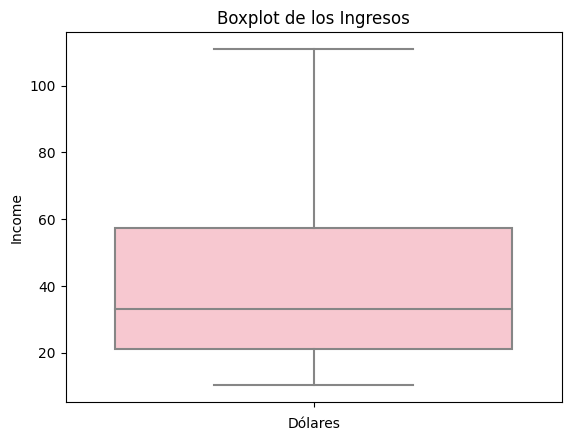

In [36]:
sns.boxplot(y=Credit["Income"],color = "pink", showfliers = False) # Cambio de y por x para que me muestre la gráfica horizontal, showfliers es para que no me muestre los outliers

# Los outliers son los puntos que están por fuera de los bigotes
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Income', ylabel='Gender'>

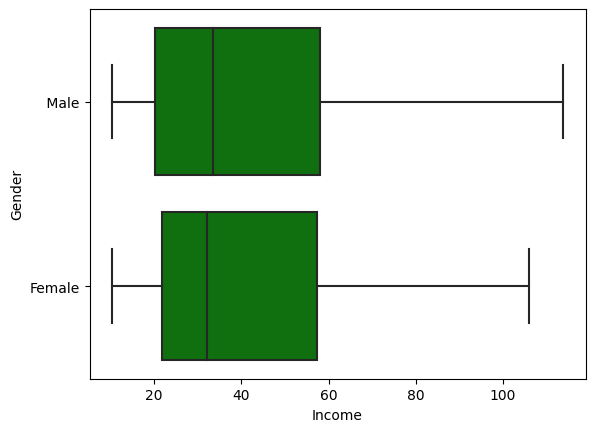

In [41]:
sns.boxplot(x=Credit['Income'], y=Credit["Gender"],color = "green", showfliers = False)

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Income', ylabel='Gender'>

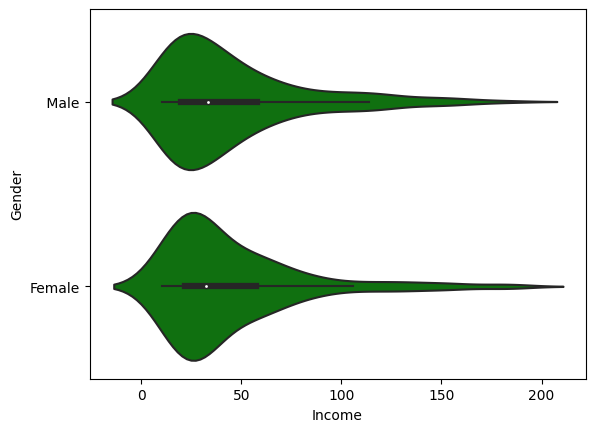

In [40]:
# Grafico del violin
sns.violinplot(x=Credit['Income'], y=Credit["Gender"],color = "green", showfliers = False) # Cambio de y por x para que me muestre la gráfica horizontal, showfliers es para que no me muestre los outliers

In [ ]:
sns.boxplot(x=Credit["Income"], color="pink")
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")

#Pongamosle las lineas
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='green', label='Q1')
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='blue', label='Q2/Mediana')
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='red', label='Q3')
plt.legend()
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], y=Credit["Gender"])
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.show()

In [ ]:
sns.boxplot(x=Credit["Income"], y=Credit["Ethnicity"])
plt.title("Boxplot de los Ingresos por Etnia")
plt.xlabel("Dólares")
plt.show()

### Valores atípicos/extremos/outliers
Se definen como observaciones extremas a aquellas que se encuentran fuera del rango $$[Q_1-(1.5 \times IQR) ; Q_3 +(1.5 \times IQR)]$$

In [42]:
IQR  = stats.iqr(Credit["Income"])
whis = 1.5
cons = IQR * whis

#Cuartiles
Q1   = Credit["Income"].quantile(0.25)
Q3   = Credit["Income"].quantile(0.75)

print("El límite inferior para valores extremos es:", (Q1-cons))
print("El límite superior para valores extremos es:", (Q3+cons))

El límite inferior para valores extremos es: -33.688
El límite superior para valores extremos es: 112.166


In [43]:
IQR = Q3 - Q1
print("El rango intercuartil es:", IQR)

El rango intercuartil es: 36.4635


In [44]:
iqr_min = Q1 - 1.5 * IQR
iqr_max = Q3 + 1.5 * IQR
print("El límite inferior para valores extremos es:", iqr_min)
print("El límite superior para valores extremos es:", iqr_max)

El límite inferior para valores extremos es: -33.688
El límite superior para valores extremos es: 112.166


In [47]:
credit_sin_outliers = Credit[Credit["Income"] < iqr_max]

In [48]:
credit_sin_outliers.shape

(371, 12)

In [49]:
credit_sin_outliers.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


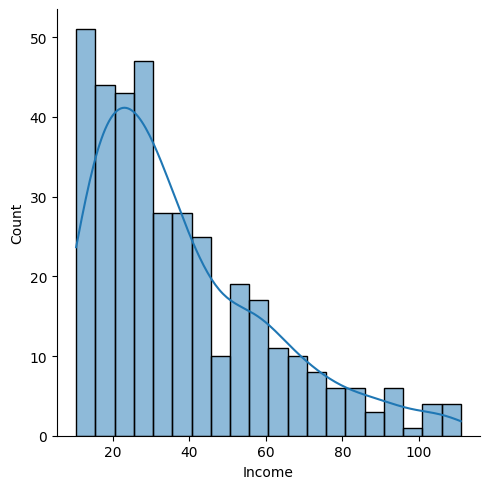

In [51]:
sns.displot(credit_sin_outliers, x='Income', bins=20, kde=True)

c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elogrono\Documents\Github\Maestria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

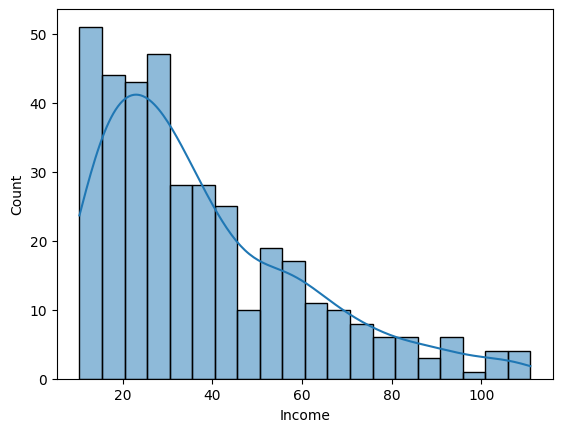

In [52]:
sns.histplot(credit_sin_outliers, x='Income', bins=20, kde=True)

In [ ]:
sns.boxplot(x=Credit["Income"], color="pink", whis=1.5)
plt.title("Boxplot de los Ingresos")
plt.xlabel("Dólares")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

In [ ]:
sns.histplot(Credit["Income"], color ="darkblue", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(🌶️🌶️🌶️🌶️🌶️🌶️🌶️, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

# 🌶 3
**Ejercicio 3:** Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`


```
Respuesta:
Quintiles:
0.2    11.0
0.4    13.0
0.6    15.0
0.8    16.0
Name: Education, dtype: float64

IQR Educación: 5.0
```



In [ ]:
# Encuentre los quintiles y el rango intercuartil de la columna `Education` del  DataFrame `Credit`



## 5. Medidas de Forma
Interprete el coeficiente de asimetría y la curtosis

[Asimentria wikipedia](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica)

[Curtosis wikipedia](https://es.wikipedia.org/wiki/Curtosis)

La asimetría de los datos representa la medida en que los valores de los datos no son simétricos con respecto a la media. Una forma de medir la asimetría es comparando la media y la mediana de la distribución.

*   Mean > Median: Distribución positiva o sesgada a la derecha
*   Mean = Median: Zero skewness o distribución simetrica
*   Mean < Median: Distribución Negativa o sesgada a la izquierda

<img src="https://miro.medium.com/max/1028/1*h5hWyG0USsED8TOOc5D4fA.png">

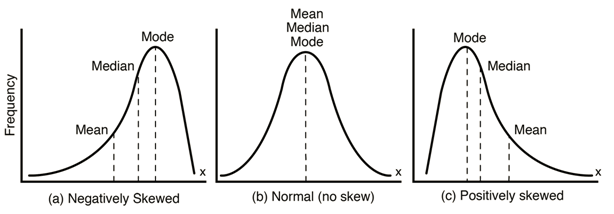

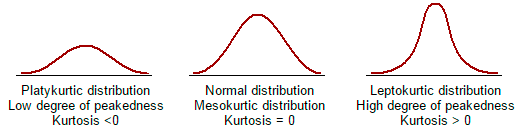

Source : tekmarathon.com



In [ ]:
print("El coeficiente de asimetría es igual a:", Credit["Income"].skew())
print("La curtosis es igual a:", Credit["Income"].kurtosis())

In [ ]:
sns.distplot(Credit["Income"], color="darkred", kde=True)
plt.title("Ingresos")
plt.xlabel("Dólares")
plt.ylabel("Frecuencia Relativa")
plt.axvline(media, color='red', label='Promedio')
plt.axvline(mediana, color='yellow', label='Mediana')
plt.axvline(moda[0], color='green', label='Moda')
plt.legend()
plt.show()

# 🌶 4

Ejercicio 4: Obtenga el coeficiente de asimetría y la curtosis de la columna Rating del DataFrame Credit


```
Respuesta:
Coeficiente de asimetría: 0.8653935227370102
Curtosis: 1.0609469816702823
```



In [ ]:
# Tu magia aquí

## 6. Covarianza y correlación

Analizar las relaciones **lineales** entre dos variables cuantitativas por medio de la covarianza y correlación.

- **Covarianza**: Nos da el signo de la relación entre dos variables, pero no podemos determinar la intensidad en la relación entre las mismas
- **Coeficiente de correlación de Person**: Nos permite entender la relación entre las variables tanto su dirección (signo) e intensidad (valor). Se encuentra entre los valores de -1 y 1

Es importante comprender que la correlación no representa causalidad, analicemos algunos ejemplos: [Correlación Espuria](https://www.tylervigen.com/spurious-correlations)

In [ ]:
# Matriz de varianzas y covarianzas
Credit.cov().round(decimals=2)

A diferencia de la covarianza, el coeficiente de correlación es independiente de la escala y puede tomar un valor entre -1 y +1. Un valor más cercano a -1 indica una correlación negativa entre las variables. Por ejemplo, la correlación entre Rango y Valor es igual a -0,48. Esto indica que a medida que aumenta el Valor, disminuye el Rango (que sería mayor ya que el Rango 1 se considera el más alto).

In [ ]:
# Matriz de correlaciones
Credit.corr().round(decimals=2)

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(Credit.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag_r',);